In [6]:
#what if instead of creating a bell state by applying H and cx, we H gated the second qubit too so that they are in superposition of ++ instead of 0+
from qiskit import Aer, QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from math import sqrt, pi
import numpy as np

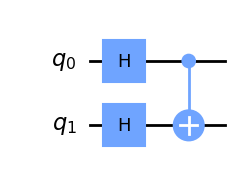

In [7]:
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cx(0, 1)
qc.draw()

In [15]:
# if qc.save_statevector() doesnt work use svsim to proceed
from qiskit import execute
sim = Aer.get_backend('statevector_simulator')
job = execute(qc, sim)
result = job.result()
Statevector = result.get_statevector()
array_to_latex(Statevector, prefix=("\\text {Statevector = }"))
#Since the CNOT swaps the amplitudes of 01 and 11 we see no changes

<IPython.core.display.Latex object>

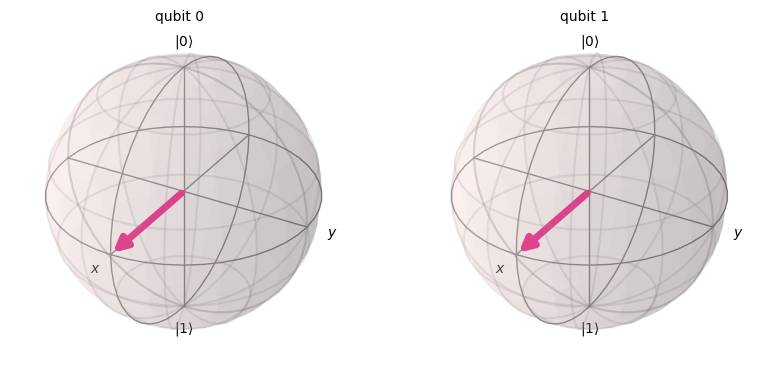

In [16]:
plot_bloch_multivector(Statevector)

In [19]:
#Let’s put the target qubit in the state |->, so it has a negative phase:
qc = QuantumCircuit(2)
qc.x(1)
qc.h([0, 1])
sim = Aer.get_backend('statevector_simulator')
job = execute(qc, sim)
result = job.result()
Statevector = result.get_statevector()
array_to_latex(Statevector, prefix="\\text {Statevector = }")

<IPython.core.display.Latex object>

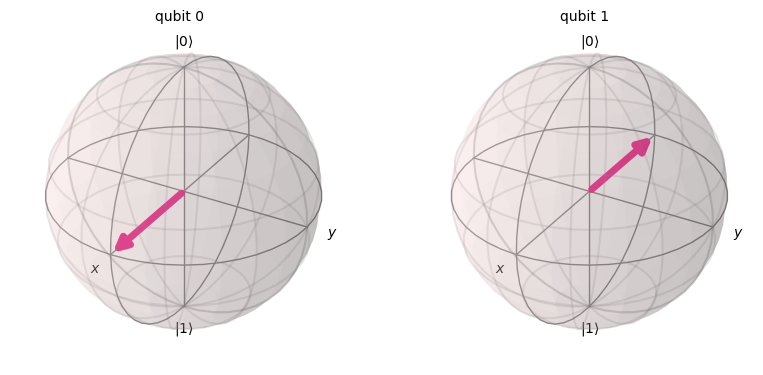

In [21]:
plot_bloch_multivector(Statevector)

In [24]:
#If the CNOT acts on this state, we will swap the amplitudes 01 and 11
qc.cx(0, 1)

In [31]:
sim = Aer.get_backend('statevector_simulator')
job = execute(qc, sim)
result = job.result()
Statevector = result.get_statevector()
array_to_latex(Statevector, prefix="\\text {Statevector = }")

<IPython.core.display.Latex object>

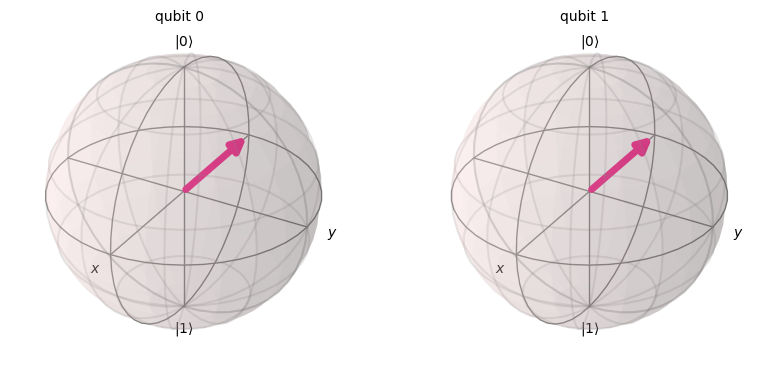

In [26]:
#This is interesting, because it affects the state of the control qubit while leaving the state of the target qubit unchanged. see the phase change
plot_bloch_multivector(Statevector)

In [56]:
#defining a simulation fn that takes the circuit as input and outputs the statevector in latex
def run_sim(qc):
    sim = Aer.get_backend('unitary_simulator')
    job = execute(qc, sim)
    result = job.result()
    Statevector = result.get_unitary()
    return Statevector

# Example usage:
# Define your quantum circuit 'qc' here before calling run_sim
# qc = QuantumCircuit(...)
# result = run_sim(qc)
# print(result)  # This will print the Statevector if you want to see it
array_to_latex(Statevector, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [57]:
#we can see that wrapping a CNOT in H-gates has the equivalent behaviour of a CNOT acting in the opposite direction:We can verify this using Qiskit's Aer simulator:
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cx(0, 1)
qc.h([0, 1])

result = run_sim(qc)
array_to_latex(result, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [58]:
import numpy as np
qc = QuantumCircuit(2)
qc.cx(1, 0)
run_sim(qc)
array_to_latex(result, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [ ]:
#hence proved. note that you have to run get_unitary if you want a full 4x4 unitary matrix for getsv they only give the first row
#the eigenvalue added by a gate to a qubit is ‘kicked back’ into a different qubit via a controlled operation.